Here I will try and constrcut a heom to the model in thoss directly.


Notation:  sigma=\pm refers to input/output

K=L/R  left anr right leads,e tc


will try and use the Pade decmoposition without understanding it

#spectral dnesity is lorentzian 

$$J(\omega) = \Gamma  W^2 /((\omega-\mu_K)^2 +W^2 )$$



fermio distribution is

$$f_F (x) = (\exp(x) + 1)^{-1}$$

correlations

$$C^{\sigma}_K(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} d\omega e^{\sigma i \omega t} \Gamma_K(\omega) f_F[\sigma\beta(\omega - \mu)]$$


The Pade decompoisiton approximates the fermif distubition as 

$$f_F(x) \approx f_F^{\mathrm{approx}}(x) = \frac{1}{2} - \sum_l^{l_{max}} \frac{2k_l x}{x^2 + \epsilon_l^2}$$

$$k_l$$ and $$\epsilon_l$$ are some weird cooeffiients from j chem phys 133,10106

evaluating the integral for the correlation functions gives (equaiton S4 in thoss supp info)


$$C_K^{\sigma}(t) \approx \sum_{l=0}^{l_{max}} \eta_K^{\sigma_l} e^{-\gamma_{K,\sigma,l}t}$$

where

$$\eta_{K,0} = \frac{\Gamma_KW_K}{2} f_F^{approx}(i\beta_K W)$$

$$\gamma_{K,\sigma,0} = W_K - \sigma i\mu_K$$ (not surpising these two are non-Matsubara)

$$\eta_{K,l\neq 0} = -i\cdot \frac{k_m}{\beta_K} \cdot \frac{\Gamma_K W_K^2}{-\frac{\epsilon^2_m}{\beta_K^2} + W_K^2}$$

$$\gamma_{K,\sigma,l\neq 0}= \frac{\epsilon_m}{\beta_K} - \sigma i \mu_K$$  (hmm)

In [1]:
from qutip import *
%pylab inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Populating the interactive namespace from numpy and matplotlib


/home/neill/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['identity', 'info', 'squeeze', 'shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
%load_ext autoreload
%autoreload 2

In [15]:
#import heom_fermions_pochen as heom_fermions
from heom_fmotd_NL import FermionicHEOMSolver as FermionicHEOMSolverPY

In [5]:
from heom_fmotd import FermionicHEOMSolver

In [6]:
def deltafun(j,k):
    if j==k: 
        return 1.
    else:
        return 0.

In [7]:

from scipy.integrate import quad
import scipy as scipy

In [8]:
#I need to add Ncc back in, which i do here:
from qutip.states import enr_state_dictionaries

def get_aux_matrices(full, level, N_baths, Nk, N_cut):
    """
    Extracts the auxiliary matrices at a particular level
    from the full hierarchy ADOs.
    
    Parameters
    ----------
    full: ndarray
        A 2D array of the time evolution of the ADOs.
    
    level: int
        The level of the hierarchy to get the ADOs.
        
    Nc: int
        The hierarchy cutoff.
    
    k: int
        The total number of exponentials used to express the correlation.
    """
    #Note: Max N_cut is Nk*N_baths
    nstates, state2idx, idx2state =enr_state_dictionaries([2]*(Nk*N_baths) ,N_cut)#_heom_state_dictionaries([Nc + 1]*(Nk), Nc)
    aux_indices = []
    
    aux_heom_indices = []
    for stateid in state2idx:
        if np.sum(stateid) == level:
            aux_indices.append(state2idx[stateid])
            aux_heom_indices.append(stateid)
    full = np.array(full)
    aux = []

    for i in aux_indices:
        qlist = [Qobj(full[k, i, :].reshape(2, 2).T) for k in range(len(full))]
        aux.append(qlist)
    return aux, aux_heom_indices, idx2state

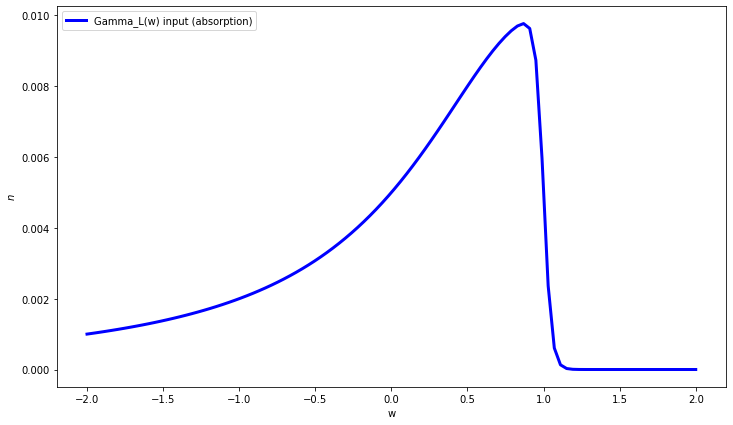

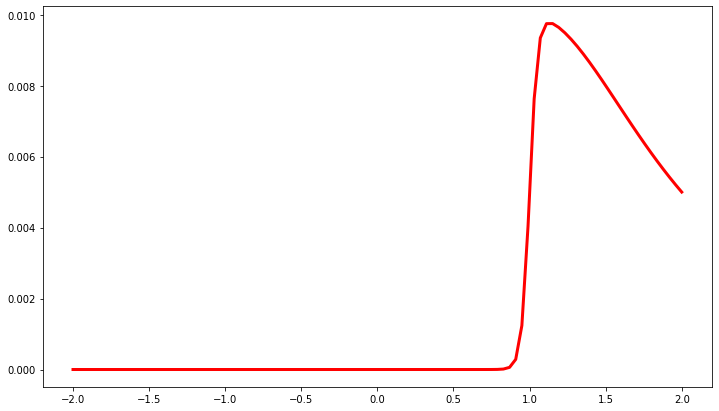

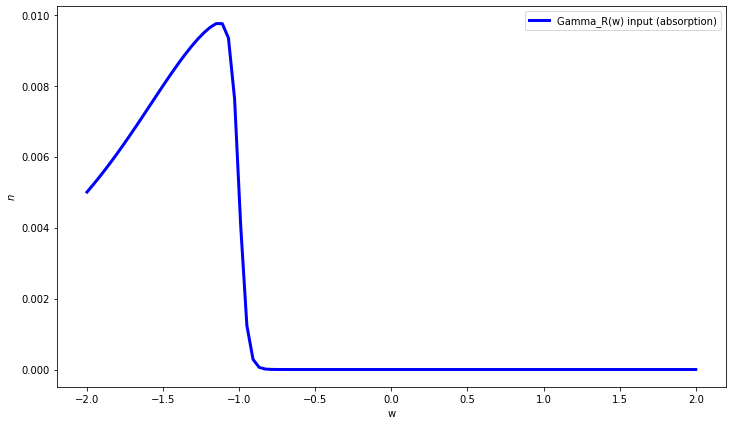

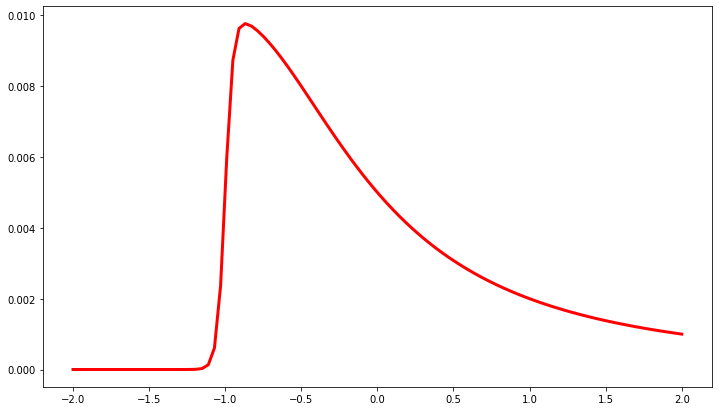

In [9]:
#parameters and spectra check

#thoss
Gamma = 0.01
#phillip
#Gamma =10

#thoss
#W = 10**4
#phillip
#W=0.1
#pade paper
#Gamma = 1.
W=1.
 
#T = 300
T = 0.025851991 #in ev
beta = 1./T

theta = 2.
mu_l = theta/2.
mu_r = -theta/2.

w_list = np.linspace(-2,2,100)

def Gamma_L_w(w):
    return Gamma*W**2/((w-mu_l)**2 + W**2)

def Gamma_R_w(w):
    return Gamma*W**2/((w-mu_r)**2 + W**2)


def f(x):
    kB=1.
    return 1/(exp(x)+1.)
def f2(x):
    return 0.5

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_L_w(w)*f(beta*(w-mu_l)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_L(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()
fig, ax2 = plt.subplots(figsize=(12, 7))
#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_L_w(w)*f(-beta*(w-mu_l)) for w in w_list]
spec = [Gamma_L_w(w) for w in w_list]
#print(gam_list)
ax2.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_R_w(w)*f(beta*(w-mu_r)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_R(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()
fig, ax2 = plt.subplots(figsize=(12, 7))
#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_R_w(w)*f(-beta*(w-mu_r)) for w in w_list]
spec = [Gamma_R_w(w) for w in w_list]
#print(gam_list)
ax2.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_R(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")


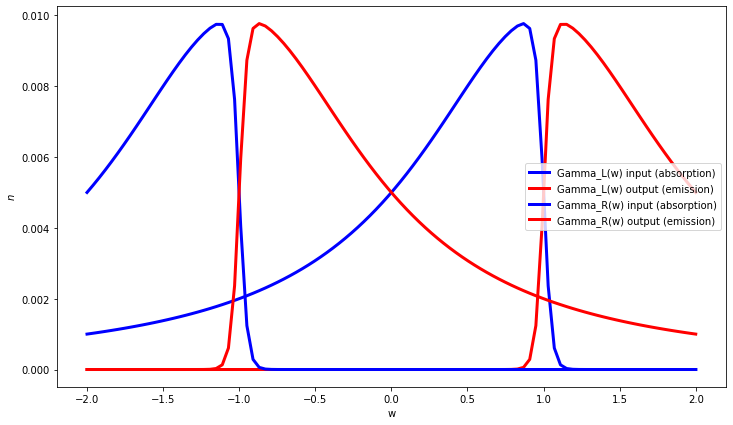

In [10]:

fig, ax1 = plt.subplots(figsize=(12, 7))
gam_list_in = [Gamma_L_w(w)*f(beta*(w-mu_l)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_L(w) input (absorption)")

#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()

#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_L_w(w)*f(-beta*(w-mu_l)) for w in w_list]
spec = [Gamma_L_w(w) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")

gam_list_in = [Gamma_R_w(w)*f(beta*(w-mu_r)) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_in, color="b", linewidth=3, label= r"Gamma_R(w) input (absorption)")



#ax2.plot(E_list,[f_L(E) for E in E_list], color="r", linewidth=3, label= r"fl")
gam_list_out = [Gamma_R_w(w)*f(-beta*(w-mu_r)) for w in w_list]
spec = [Gamma_R_w(w) for w in w_list]
#print(gam_list)
ax1.plot(w_list,gam_list_out, color="r", linewidth=3, label= r"Gamma_R(w) output (emission)")
#ax2.plot(w_list,spec, color="g", linewidth=3, label= r"Gamma_L(w) output (emission)")
#ax1.set_ylim(0, 0.1)
ax1.set_xlabel("w")
ax1.set_ylabel(r"$n$")
ax1.legend()

[0, 1.0000000000000044, 1.00000000006742, 1.0000228395795219, 1.020252353432799, 1.5437566757022019, 4.5454079543805195, 42.39056017683753]
[0, 3.141592653589793, 9.424777960792557, 15.707978018046145, 22.014866289497427, 29.485632260284962, 46.15742987917688, 134.20133457603438]


/home/neill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
/home/neill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: overflow encountered in exp
/home/neill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: DeprecationWarning: scipy.imag is deprecated and will be removed in SciPy 2.0.0, use numpy.imag instead


[(0.0025-0.0015778478288730755j), -0.0002602364577000628j, -0.0002748355117099625j, -0.00030957579190690006j, -0.00039011715472080447j, -0.000952586093590817j, (-0+0.00277224236367158j), (-0+0.000992956474830042j)]
[(1-1j), (0.08121642500626945-1j), (0.24364927501940756-1j), (0.4060825063507268-1j), (0.5691281251822908-1j), (0.7622622998221965-1j), (1.1932614618196118-1j), (3.4693716936476298-1j)]


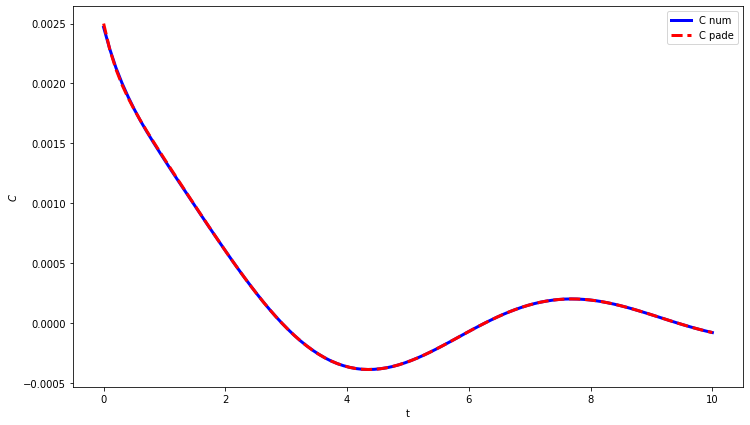

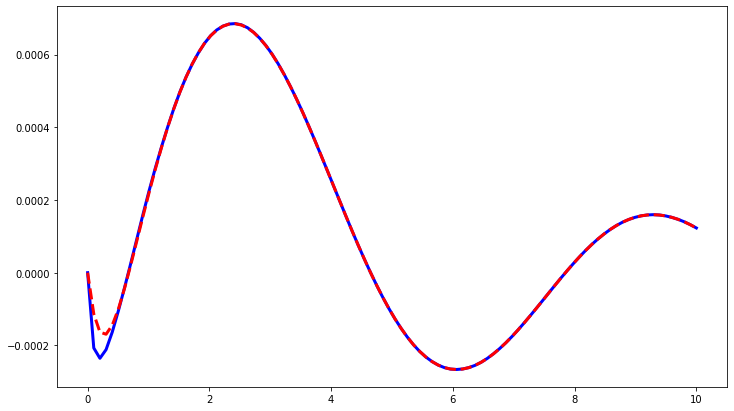

In [11]:
#Try integrable 2-bath model
#here I use paramaers from phillips paper
#this collates pade parameters
tlist = np.linspace(0,0.001,100)
tlist = np.linspace(0,10,100)



lmax =7



#beta = 1./T
#beta = np.inf

w_list = np.linspace(-2,2,100)

def Gamma_L_w(w):
    return Gamma*W**2/((w-mu_l)**2 + W**2)

def Gamma_w(w, mu):
    return Gamma*W**2/((w-mu)**2 + W**2)


def f(x):
    kB=1.
    return 1/(exp(x)+1.)





#Next compare pade decomp to numerical integration

Alpha =np.zeros((2*lmax,2*lmax))
for j in range(2*lmax):
    for k in range(2*lmax):
        Alpha[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)-1)*(2*(k+1)-1))
        
eigvalsA=eigvalsh(Alpha)  

eps = []
for val in  eigvalsA[0:lmax]:
    #print(-2/val)
    eps.append(-2/val)
    

AlphaP =np.zeros((2*lmax-1,2*lmax-1))
for j in range(2*lmax-1):
    for k in range(2*lmax-1):
        AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+1)+1)*(2*(k+1)+1))
        #AlphaP[j][k] = (deltafun(j,k+1)+deltafun(j,k-1))/sqrt((2*(j+2)-1)*(2*(k+2)-1))
        
eigvalsAP=eigvalsh(AlphaP)    


chi = []
for val in  eigvalsAP[0:lmax-1]:
    #print(-2/val)
    chi.append(-2/val)

    
eta_list=[0.5*lmax*(2*(lmax + 1) - 1)*( 
  np.prod([chi[k]**2 - eps[j]**2 for k in range(lmax - 1)])/
    np.prod([eps[k]**2 - eps[j]**2 +deltafun(j,k) for k in range(lmax)])) 
          for j in range(lmax)]


#kappa = [0,1,1,1.56,14.44]
kappa = [0]+eta_list
print(kappa)
#epsilon = [0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi]
#print([0,1*pi,1*3*pi,1.06*5*pi,2.11*7*pi])
epsilon = [0]+eps
print(epsilon)
def f_approx(x):
    f = 0.5
    for l in range(1,lmax+1):
        f= f - 2*kappa[l]*x/(x**2+epsilon[l]**2)
    return f

def f(x):
    kB=1.
    return 1/(exp(x)+1.)


def C(tlist,sigma,mu):
    eta_list = []
    gamma_list  =[]
    
    #l = 0
    eta_0 = 0.5*Gamma*W*f_approx(1.0j*beta*W)
    #eta_0 = 0.5*Gamma*W*f(1.0j*beta*W)
    gamma_0 = W - sigma*1.0j*mu
    eta_list.append(eta_0)
    gamma_list.append(gamma_0)
    if lmax>0:
        for l in range(1,lmax+1):
            eta_list.append(-1.0j*(kappa[l]/beta)*Gamma*W**2/(-(epsilon[l]**2/beta**2)+W**2))
            gamma_list.append(epsilon[l]/beta - sigma*1.0j*mu)
    c_tot = []
    for t in tlist:
        c_tot.append(sum([eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]))
    return c_tot, eta_list, gamma_list
 
    
#sigma = -  is dsetroy in environment create electron in system


def c_t_L_num(t,sigma,mu):
    
    integrand = lambda w: (1/(2*pi))*exp(sigma*1.0j*w*t)*Gamma_w(w,mu)*f(sigma*beta*(w-mu))
    def real_func(x):
        return scipy.real(integrand(x))
    def imag_func(x):
        return scipy.imag(integrand(x))
    #return quad(integrand,-np.inf,np.inf)[0]
    #a= -600000
    #b = 600000

    a= -50
    b=50
    real_integral = quad(real_func, a, b)
    imag_integral = quad(imag_func, a, b)
    return real_integral[0] + 1.0j * imag_integral[0]
    

#tlist = np.linspace(0,1e-3,100)


cppL,etapL,gampL = C(tlist,1.0,mu_l)

cpmL,etamL,gammL = C(tlist,-1.0,mu_l)

#mu_r = -mu_l

cppR,etapR,gampR = C(tlist,1.0,mu_r)

cpmR,etamR,gammR = C(tlist,-1.0,mu_r)


c_num =[c_t_L_num(t,-1.0,mu_r) for t in tlist]

print(etamR)
print(gammR)
fig, ax1 = plt.subplots(figsize=(12, 7))
#print(gam_list)
#ax1.plot(tlist,real(cpmR)-real(c_num), color="b", linewidth=3, label= r"C pade")
ax1.plot(tlist,real(c_num), color="b", linewidth=3, label= r"C num")
ax1.plot(tlist,real(cpmR), "r--", linewidth=3, label= r"C pade")
pos = 1
#ax1.plot(tlist,real([etamR[pos]*exp(-gammR[pos]*t) for t in tlist]),"g--", linewidth=3, label= r"C pade")
#[eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]
#ax1.plot(tlist,real(c_num), "r--", linewidth=3, label= r"C num")


ax1.set_xlabel("t")
ax1.set_ylabel(r"$C$")
ax1.legend()
fig, ax1 = plt.subplots(figsize=(12, 7))
#print(gam_list)
ax1.plot(tlist,imag(c_num), color="b", linewidth=3, label= r"C num")
ax1.plot(tlist,imag(cpmR), "r--", linewidth=3, label= r"C pade")
pos = 0
#ax1.plot(tlist,imag([etamR[pos]*exp(-gammR[pos]*t) for t in tlist]),"r--", linewidth=3, label= r"C pade")

#ax1.plot(tlist,imag(c_num), "y--", linewidth=3, label= r"C num")


In [35]:
(etamR)

array([ 0.0135723 , -0.00025852, -0.00025852, -0.00025853, -0.00026376,
       -0.00039909, -0.00117508, -0.01095881])

In [36]:
gammR

[(10000-1j),
 (0.08121642500626945-1j),
 (0.24364927501940756-1j),
 (0.4060825063507268-1j),
 (0.5691281251822908-1j),
 (0.7622622998221965-1j),
 (1.1932614618196118-1j),
 (3.4693716936476298-1j)]

In [11]:
eta_list

[[(25+0.013572296614562641j),
  -0.0002585199100170534j,
  -0.0002585199101708997j,
  -0.0002585258149123593j,
  -0.0002637555474410576j,
  -0.0003990918391833308j,
  -0.0011750784720113603j,
  -0.010958805120826578j],
 [(25+0.013572296614562641j),
  -0.0002585199100170534j,
  -0.0002585199101708997j,
  -0.0002585258149123593j,
  -0.0002637555474410576j,
  -0.0003990918391833308j,
  -0.0011750784720113603j,
  -0.010958805120826578j],
 [(25+0.013572296614562641j),
  -0.0002585199100170534j,
  -0.0002585199101708997j,
  -0.0002585258149123593j,
  -0.0002637555474410576j,
  -0.0003990918391833308j,
  -0.0011750784720113603j,
  -0.010958805120826578j],
 [(25+0.013572296614562641j),
  -0.0002585199100170534j,
  -0.0002585199101708997j,
  -0.0002585258149123593j,
  -0.0002637555474410576j,
  -0.0003990918391833308j,
  -0.0011750784720113603j,
  -0.010958805120826578j]]

In [57]:
#heom simu on above params (Pade)


d1 = destroy(2)

e1 = 1. #d1 = spin up


H0 = e1*d1.dag()*d1 

#Qops = [d1,d1.dag()]
Qops = [d1.dag(),d1,d1.dag(),d1]


rho_0 = basis(2,0)*basis(2,0).dag()

Kk=lmax+1
Ncc=2*2
Ncc=2*4
Ncc = 4*Kk
Ncc = 2
tlist = np.linspace(0,100,1000)


eta_list = [etapR,etamR,etapL,etamL]
#T=0:
#eta_list = [[Gamma*W/2.],[0.]]
#eta_list = [[0.],[Gamma*W/2.]]
print(eta_list)
gamma_list = [gampR,gammR,gampL,gammL]
print(gamma_list)
import time
start = time.time()
#resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
resultHEOM1 = FermionicHEOMSolverPY(H0, Qops,  eta_list, gamma_list, Ncc)
end = time.time()
print("original code",end - start)

start = time.time()
#out1P,full1P=resultHEOM1.run(rho_0,tlist)
resultHEOM2 = FermionicHEOMSolver(H0, Qops,  eta_list, gamma_list, Ncc)
end = time.time()
print("new code", end - start)


#Pg1 = expect(out1.states,sz)
#Pgg1 = expect(out1.states,sm*sm.dag())
#1mev = 1.51926741 × 10^12 hertz 
#fig, ax1 = plt.subplots(figsize=(12, 7))
#
#ax1.plot(tlist,expect(out1P.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
#ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.set_ylim(0, 1)
#ax1.set_xlabel("t")
#ax1.set_ylabel(r"pop")
#ax1.legend()


[[(0.0025-0.0015778478288730755j), -0.0002602364577000628j, -0.0002748355117099625j, -0.00030957579190690006j, -0.00039011715472080447j, -0.000952586093590817j, (-0+0.00277224236367158j), (-0+0.000992956474830042j)], [(0.0025-0.0015778478288730755j), -0.0002602364577000628j, -0.0002748355117099625j, -0.00030957579190690006j, -0.00039011715472080447j, -0.000952586093590817j, (-0+0.00277224236367158j), (-0+0.000992956474830042j)], [(0.0025-0.0015778478288730755j), -0.0002602364577000628j, -0.0002748355117099625j, -0.00030957579190690006j, -0.00039011715472080447j, -0.000952586093590817j, (-0+0.00277224236367158j), (-0+0.000992956474830042j)], [(0.0025-0.0015778478288730755j), -0.0002602364577000628j, -0.0002748355117099625j, -0.00030957579190690006j, -0.00039011715472080447j, -0.000952586093590817j, (-0+0.00277224236367158j), (-0+0.000992956474830042j)]]
[[(1+1j), (0.08121642500626945+1j), (0.24364927501940756+1j), (0.4060825063507268+1j), (0.5691281251822908+1j), (0.7622622998221965+1j)

4
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
214
(4, 4)
4
(2116, 2116)
4
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
194
(4, 4)
4
(2116, 2116)
4
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
175
(4, 4)
4
(2116, 2116)
4
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
157
(4, 4)
4
(2116, 2116)
4
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
140
(4, 4)
4
(2116, 2116)
4
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
124
(4, 4)
4
(2116, 2116)
4
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
109
(4, 4)
4
(2116, 2116)
4
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
95
(4, 4)
4
(2116, 2116)
4

16
(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)
260
(4, 4)
4
(2116, 2116)
16
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)
238
(4, 4)
4
(2116, 2116)
16
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)
217
(4, 4)
4
(2116, 2116)
16
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)
197
(4, 4)
4
(2116, 2116)
16
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)
178
(4, 4)
4
(2116, 2116)
16
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)
160
(4, 4)
4
(2116, 2116)
16
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)
143
(4, 4)
4
(2116, 2116)
16
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)
127
(4, 4)
4
(2116

46
(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
507
(4, 4)
4
(2116, 2116)
46
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
476
(4, 4)
4
(2116, 2116)
46
(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
446
(4, 4)
4
(2116, 2116)
46
(0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
417
(4, 4)
4
(2116, 2116)
46
(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
389
(4, 4)
4
(2116, 2116)
46
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
362
(4, 4)
4
(2116, 2116)
46
(0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
336
(4, 4)
4
(2116, 2116)
46
(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
311
(4, 4)
4
(2116

67
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0)
72
(4, 4)
4
(2116, 2116)
67
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)
71
(4, 4)
4
(2116, 2116)
67
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
70
(4, 4)
4
(2116, 2116)
67
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)
69
(4, 4)
4
(2116, 2116)
67
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
68
(4, 4)
4
(2116, 2116)
79
(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
510
(4, 4)
4
(2116, 2116)
79
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
479
(4, 4)
4
(2116, 2116)
79
(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
449
(4, 4)
4
(2116, 211

121
(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
513
(4, 4)
4
(2116, 2116)
121
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
482
(4, 4)
4
(2116, 2116)
121
(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
452
(4, 4)
4
(2116, 2116)
121
(0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
423
(4, 4)
4
(2116, 2116)
121
(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
395
(4, 4)
4
(2116, 2116)
121
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
368
(4, 4)
4
(2116, 2116)
121
(0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
342
(4, 4)
4
(2116, 2116)
121
(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
317
(4, 4)

172
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
182
(4, 4)
4
(2116, 2116)
172
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
181
(4, 4)
4
(2116, 2116)
172
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)
180
(4, 4)
4
(2116, 2116)
172
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0)
179
(4, 4)
4
(2116, 2116)
172
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)
178
(4, 4)
4
(2116, 2116)
172
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0)
177
(4, 4)
4
(2116, 2116)
172
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)
176
(4, 4)
4
(2116, 2116)
172
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
175
(4, 4)

232
(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
519
(4, 4)
4
(2116, 2116)
232
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
488
(4, 4)
4
(2116, 2116)
232
(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
458
(4, 4)
4
(2116, 2116)
232
(0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
429
(4, 4)
4
(2116, 2116)
232
(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
401
(4, 4)
4
(2116, 2116)
232
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
374
(4, 4)
4
(2116, 2116)
232
(0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
348
(4, 4)
4
(2116, 2116)
232
(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
323
(4, 4)

301
(1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
522
(4, 4)
4
(2116, 2116)
301
(0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
491
(4, 4)
4
(2116, 2116)
301
(0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
461
(4, 4)
4
(2116, 2116)
301
(0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
432
(4, 4)
4
(2116, 2116)
301
(0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
404
(4, 4)
4
(2116, 2116)
301
(0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
377
(4, 4)
4
(2116, 2116)
301
(0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
351
(4, 4)
4
(2116, 2116)
301
(0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
325
(4, 4)

352
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
373
(4, 4)
4
(2116, 2116)
352
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
372
(4, 4)
4
(2116, 2116)
352
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
371
(4, 4)
4
(2116, 2116)
352
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
370
(4, 4)
4
(2116, 2116)
352
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
369
(4, 4)
4
(2116, 2116)
352
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
368
(4, 4)
4
(2116, 2116)
352
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
367
(4, 4)
4
(2116, 2116)
352
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
366
(4, 4)

436
(1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
527
(4, 4)
4
(2116, 2116)
436
(0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
496
(4, 4)
4
(2116, 2116)
436
(0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
465
(4, 4)
4
(2116, 2116)
436
(0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
464
(4, 4)
4
(2116, 2116)
436
(0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
463
(4, 4)
4
(2116, 2116)
436
(0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
462
(4, 4)
4
(2116, 2116)
436
(0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
461
(4, 4)
4
(2116, 2116)
436
(0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
460
(4, 4)

original code 6.347541332244873
new code 0.284395694732666


In [40]:
resultHEOM2.RHSmat

<2116x2116 sparse matrix of type '<class 'numpy.complex128'>'
	with 10306 stored elements in Compressed Sparse Row format>

In [42]:

start = time.time()

rhossHP,fullssP=resultHEOM1.ss(rho_0,H0)
end = time.time()
print(end - start)

start = time.time()

rhossHP2,fullssP2=resultHEOM2.steady_state(H0,rho_0)
end = time.time()
print(end - start)



0.07116127014160156
0.023896455764770508


/home/neill/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [43]:
resultHEOM2.RHSmat

<2116x2116 sparse matrix of type '<class 'numpy.complex128'>'
	with 12390 stored elements in Compressed Sparse Row format>

In [62]:
out1P=resultHEOM1.run(rho_0,tlist)


In [63]:
out1P2=resultHEOM2.run(rho_0,tlist)

/home/neill/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


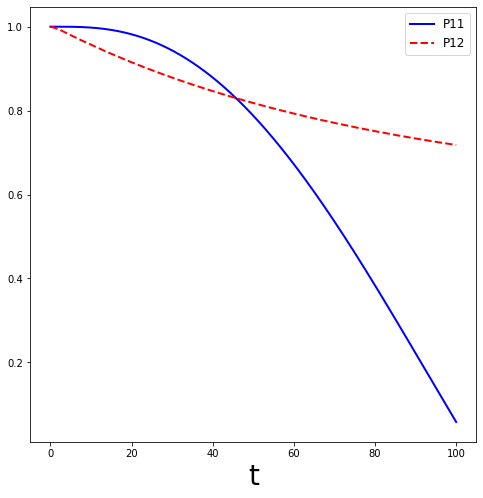

In [64]:
# Plot the results
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(tlist, expect(out1P.states,rho_0), 'b', linewidth=2, label="P11")
axes.plot(tlist, expect(out1P2.states,rho_0), 'r--', linewidth=2, label="P12")
axes.set_xlabel(r't', fontsize=28)
axes.legend(loc=0, fontsize=12)

/home/neill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
/home/neill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: overflow encountered in exp
/home/neill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning: scipy.imag is deprecated and will be removed in SciPy 2.0.0, use numpy.imag instead


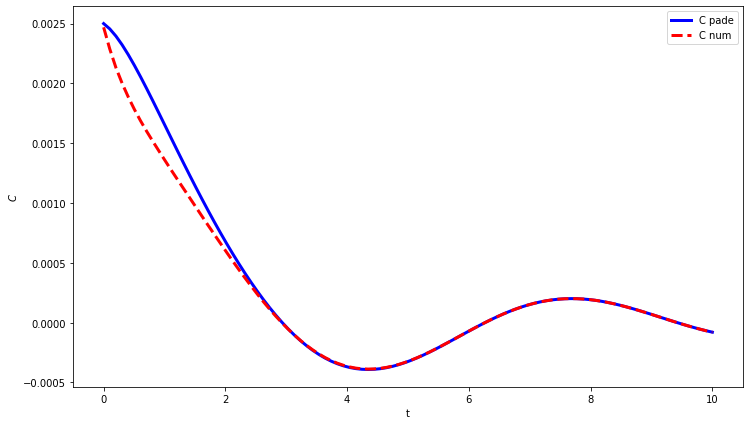

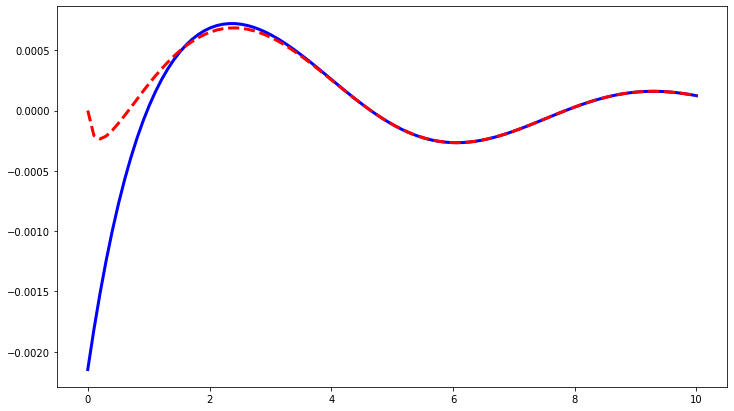

In [78]:
#asa comparison, this is matsubara
#tlist = np.linspace(0,0.001,100)
tlist = np.linspace(0,10,100)



#lmax = 1000000
#lmax = 1000000
lmax = 7
kappa = [0.]
kappa.extend([1. for l in range(1,lmax+1)])
epsilon = [0]
epsilon.extend([(2*l-1)*pi for l in range(1,lmax+1)])

def f_approx(x):
    f = 0.5
    for l in range(1,lmax+1):
        f= f - 2*kappa[l]*x/(x**2+epsilon[l]**2)
    return f

def C(tlist,sigma,mu):
    eta_list = []
    gamma_list  =[]
    
    #l = 0
    eta_0 = 0.5*Gamma*W*f(1.0j*beta*W)
    gamma_0 = W - sigma*1.0j*mu
    eta_list.append(eta_0)
    gamma_list.append(gamma_0)
    if lmax>0:
        for l in range(1,lmax+1):
            eta_list.append(-1.0j*(kappa[l]/beta)*Gamma*W**2/(-(epsilon[l]**2/beta**2)+W**2))
            gamma_list.append(epsilon[l]/beta - sigma*1.0j*mu)
    c_tot = []
    for t in tlist:
        c_tot.append(sum([eta_list[l]*exp(-gamma_list[l]*t) for l in range(lmax+1)]))
    return c_tot, eta_list, gamma_list

def c_t_L_num(t,sigma,mu):
    
    integrand = lambda w: (1/(2*pi))*exp(sigma*1.0j*w*t)*Gamma_w(w,mu)*f(sigma*beta*(w-mu))
    def real_func(x):
        return scipy.real(integrand(x))
    def imag_func(x):
        return scipy.imag(integrand(x))
    #return quad(integrand,-np.inf,np.inf)[0]
    #a= -600000
    #b = 600000

    a = -50
    b = 50
    real_integral = quad(real_func, a, b)
    imag_integral = quad(imag_func, a, b)
    return real_integral[0] + 1.0j * imag_integral[0] 
 
#cp,eta,gam = C(tlist,1.0,mu_l)


cppL,etapL,gampL = C(tlist,1.0,mu_l)

cpmL,etamL,gammL = C(tlist,-1.0,mu_l)

#mu_r = -mu_l

cppR,etapR,gampR = C(tlist,1.0,mu_r)

cpmR,etamR,gammR = C(tlist,-1.0,mu_r)


c_num =[c_t_L_num(t,1.0,mu_l) for t in tlist]


fig, ax1 = plt.subplots(figsize=(12, 7))
#print(gam_list)
ax1.plot(tlist,real(cppL), color="b", linewidth=3, label= r"C pade")
ax1.plot(tlist,real(c_num), "r--", linewidth=3, label= r"C num")


ax1.set_xlabel("t")
ax1.set_ylabel(r"$C$")
ax1.legend()
fig, ax1 = plt.subplots(figsize=(12, 7))
#print(gam_list)
ax1.plot(tlist,imag(cppL), color="b", linewidth=3, label= r"C pade")
ax1.plot(tlist,imag(c_num), "r--", linewidth=3, label= r"C num")


In [79]:
#heom simu on above params (Matsubara)


d1 = destroy(2)

e1 = 1. #d1 = spin up


H0 = e1*d1.dag()*d1 

#Qops = [d1,d1.dag()]
Qops = [d1.dag(),d1,d1.dag(),d1]


rho_0 = basis(2,0)*basis(2,0).dag()

Kk=lmax+1
Ncc=2*2
Ncc=2*4
Ncc = 4*Kk
Ncc = 4*Kk 
Ncc = 2
tlist = np.linspace(0,100,1000)


eta_list = [etapR,etamR,etapL,etamL]
#T=0:
#eta_list = [[Gamma*W/2.],[0.]]
#eta_list = [[0.],[Gamma*W/2.]]
print(eta_list)
gamma_list = [gampR,gammR,gampL,gammL]
print(gamma_list)

import time
start = time.time()
resultHEOM1=heom_fermions.HSolverFermions(H0, [], Qops,  eta_list, gamma_list,  Ncc, Kk,renorm=False,bnd_cut_approx=False)
end = time.time()
print("original code",end - start)

start = time.time()
#out1P,full1P=resultHEOM1.run(rho_0,tlist)
resultHEOM2 = FermionicHEOMSolver(H0, Qops,  eta_list, gamma_list, Ncc)
end = time.time()
print("new code", end - start)

#Pg1 = expect(out1.states,sz)
#Pgg1 = expect(out1.states,sm*sm.dag())
#1mev = 1.51926741 × 10^12 hertz 
#fig, ax1 = plt.subplots(figsize=(12, 7))
#
#ax1.plot(tlist,expect(out1M.states,basis(2,1)*basis(2,1).dag()), color="black", linewidth=3, label= r"up")
#ax1.plot(tlist,[f(1) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.plot(tlist,[f(beta*(mu_l - mu_l)) for t in tlist], "r--", linewidth=3, label= r"up")
#ax1.set_ylim(0, 1)
#ax1.set_xlabel("t")
#ax1.set_ylabel(r"pop")
#ax1.legend()


[[(0.0025-0.0013376935246402686j), -0.00026023645770006167j, -0.0002748355116913478j, -0.0003095686066845467j, -0.0003819790980532969j, -0.0005551029196211314j, -0.0012806195499596152j, (-0+0.002253049972673186j)], [(0.0025-0.0013376935246402686j), -0.00026023645770006167j, -0.0002748355116913478j, -0.0003095686066845467j, -0.0003819790980532969j, -0.0005551029196211314j, -0.0012806195499596152j, (-0+0.002253049972673186j)], [(0.0025-0.0013376935246402686j), -0.00026023645770006167j, -0.0002748355116913478j, -0.0003095686066845467j, -0.0003819790980532969j, -0.0005551029196211314j, -0.0012806195499596152j, (-0+0.002253049972673186j)], [(0.0025-0.0013376935246402686j), -0.00026023645770006167j, -0.0002748355116913478j, -0.0003095686066845467j, -0.0003819790980532969j, -0.0005551029196211314j, -0.0012806195499596152j, (-0+0.002253049972673186j)]]
[[(1+1j), (0.08121642500626945+1j), (0.24364927501880834+1j), (0.4060821250313473+1j), (0.5685149750438862+1j), (0.7309478250564251+1j), (0.893

In [72]:
out1M,full1M=resultHEOM1.run(rho_0,tlist)
out1M2=resultHEOM2.run(rho_0,tlist)

In [ ]:

start = time.time()

rhossHM,fullssM=resultHEOM1.ss(rho_0,H0)
end = time.time()
print(end - start)

start = time.time()

rhossHM2,fullssM2=resultHEOM2.steady_state(H0,rho_0)
end = time.time()
print(end - start)



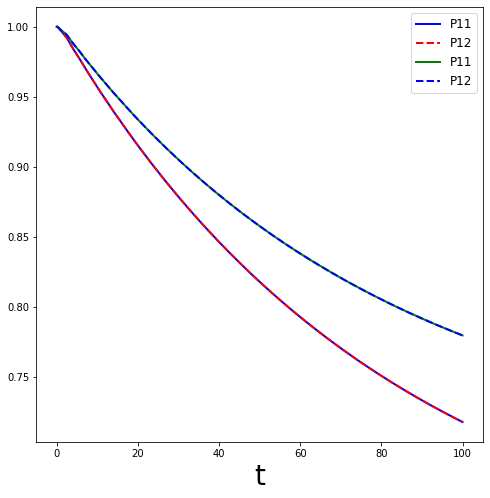

In [74]:
# Plot the results
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(tlist, expect(out1P.states,rho_0), 'b', linewidth=2, label="P11")
axes.plot(tlist, expect(out1P2.states,rho_0), 'r--', linewidth=2, label="P12")

axes.plot(tlist, expect(out1M2.states,rho_0), 'b--', linewidth=2, label="P12")

axes.set_xlabel(r't', fontsize=28)

axes.legend(loc=0, fontsize=12)

In [80]:

start = time.time()

rhossHM,fullssM=resultHEOM1.ss(rho_0,H0)
end = time.time()
print(end - start)

start = time.time()

rhossHM2,fullssM2=resultHEOM2.steady_state(H0,rho_0)
end = time.time()
print(end - start)


0.07975649833679199
0.027894973754882812


/home/neill/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/home/neill/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


/home/neill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  if __name__ == '__main__':
/home/neill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.imag is deprecated and will be removed in SciPy 2.0.0, use numpy.imag instead
  # This is added back by InteractiveShellApp.init_path()


(0.0008130726698759556+0j)


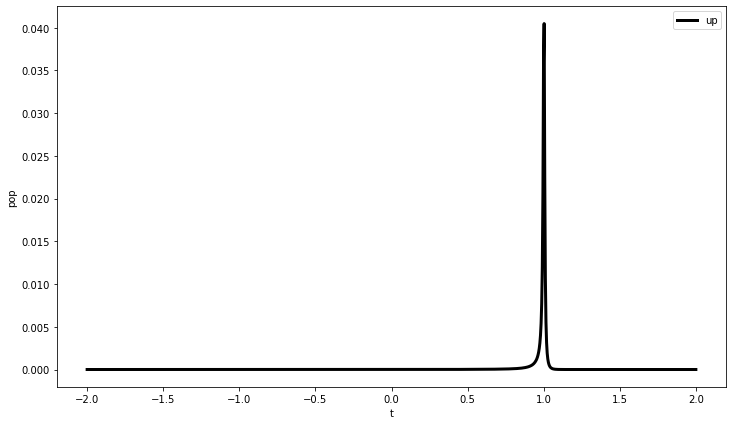

In [81]:
#note that at the moment by model is different from phillips:   w_o_r = mu_r in mine, but w_o_r = eps in phillips. fuck.

def CurrFunc():
    def lamshift(w,mu):
        return (w-mu)*Gamma_w(w,mu)/(2*W)
    integrand = lambda w: ((2/(pi))*Gamma_w(w,mu_l)*Gamma_w(w,mu_r)*(f(beta*(w-mu_l))-f(beta*(w-mu_r))) /
            ((Gamma_w(w,mu_l)+Gamma_w(w,mu_r))**2 +4*(w-e1 - lamshift(w,mu_l)-lamshift(w,mu_r))**2))
    def real_func(x):
        return scipy.real(integrand(x))
    def imag_func(x):
        return scipy.imag(integrand(x))
    #return quad(integrand,-np.inf,np.inf)[0]
    #a= -600000
    #b = 600000
    
    a= -2
    b=2
    real_integral = quad(real_func, a, b)
    imag_integral = quad(imag_func, a, b)
    fig, ax1 = plt.subplots(figsize=(12, 7))
#
    wlist2 = linspace(a,b,1000)
    ax1.plot(wlist2,[real_func(w) for w in wlist2], color="black", linewidth=3, label= r"up")
    
    
    #ax1.set_ylim(0, 1)
    ax1.set_xlabel("t")
    ax1.set_ylabel(r"pop")
    ax1.legend()

    return real_integral[0] + 1.0j * imag_integral[0]
    
curr_ana = CurrFunc()
print(curr_ana)

In [85]:
#I need to generelize this a b it better

aux_1_list_list=[]
aux1_indices_list=[]
aux_2_list_list=[]
aux2_indices_list=[]

#for kk,lam in enumerate(lamlist):
K = Kk  #this is not kk (Ihope)


#aux_1_list, aux1_indices = get_aux_matrices([fullss], 1, 4, K)
#aux_2_list, aux2_indices = get_aux_matrices([fullss], 2, 4, K)

aux_1_list, aux1_indices, idx2state = get_aux_matrices([fullssP2], 1, 4, K, Ncc)
aux_2_list, aux2_indices, idx2state = get_aux_matrices([fullssP2], 2, 4, K, Ncc)


d1 = destroy(2)   #Kk to 2*Kk
#currP = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
currP = -1.0j * (((sum([(d1*aux_1_list[gg][0]).tr() for gg in range(Kk,2*Kk)]))) - ((sum([(d1.dag()*aux_1_list[gg][0]).tr() for gg in range(Kk)]))))


    
   

In [83]:
#I need to generelize this a b it better

aux_1_list_list=[]
aux1_indices_list=[]
aux_2_list_list=[]
aux2_indices_list=[]

#for kk,lam in enumerate(lamlist):
K = Kk  #this is not kk (Ihope)


#aux_1_list, aux1_indices = get_aux_matrices([fullss], 1, 4, K)
#aux_2_list, aux2_indices = get_aux_matrices([fullss], 2, 4, K)

aux_1_list, aux1_indices, idx2state = get_aux_matrices([fullssM], 1, 4, K, Ncc)
aux_2_list, aux2_indices, idx2state = get_aux_matrices([fullssM], 2, 4, K, Ncc)


d1 = destroy(2)   #Kk to 2*Kk
#currM = [0.0]+[-1.0j * ((d1*(sum([aux_1_list[gg][t] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][t] for gg in range(Kk)]))).tr()) for t in range(999)]
#currM = -1.0j * ((d1*(sum([aux_1_list[gg][0] for gg in range(Kk,2*Kk)]))).tr() - (d1.dag()*(sum([aux_1_list[gg][0] for gg in range(Kk)]))).tr())
currM = -1.0j * (((sum([(d1*aux_1_list[gg][0]).tr() for gg in range(Kk,2*Kk)]))) - ((sum([(d1.dag()*aux_1_list[gg][0]).tr() for gg in range(Kk)]))))

In [86]:
#lmax 6 ncc=2
print(-currP)
print(-currM)
print(curr_ana)

(0.0008053078684656823+8.673617379884035e-19j)
(0.0016846207025866529+1.734723475976807e-18j)
(0.0008130726698759556+0j)


In [27]:
#lmax 7 ncc=2
print(-currP)
print(-currM)
print(curr_ana)

(0.0024676236870977654+3.469446951953614e-18j)
(0.0008208724731238981-6.938893903907228e-18j)
(0.002492000620502373+0j)


In [213]:
#lmax 7 ncc=2
print(-currP)
print(-currM)
print(curr_ana)

(0.0024676236870977654-0j)
(0.0008208724731238981-6.071532165918825e-18j)
(0.002492000620502373+0j)


In [176]:
#lmax 6 ncc=3
print(-currP)
print(-currM)
print(curr_ana)

(0.0024004876891160296+2.949029909160572e-17j)
(0.0007202020643707531-3.2959746043559335e-17j)
(0.002492000620502373+0j)


In [169]:
#lmax 7 ncc=3
print(-currP)
print(-currM)
print(curr_ana)

(0.0024676236870977523-0j)
(0.0008208724731238981+8.673617379884035e-19j)
(0.002492000620502373+0j)


In [152]:
#lmax 7 ncc=1? i am not sure
print(-currP)
print(-currM)
print(curr_ana)

(0.00019337167825506584-3.903127820947816e-18j)
(0.0001288010061298957-4.336808689942018e-19j)
(0.002492000620502373+0j)


In [144]:
#lmax 1 I think....

print(-currP)
print(-currM)
print(curr_ana)

(0.00019337167825506514-1.734723475976807e-18j)
(0.0001288010061298974+4.336808689942018e-18j)
(0.002492000620502373+0j)


In [ ]:
#note for the future... i need 3 exponents in both pade and matsubara to get analytical solution upto 0.00875 (3 sig figs?)
#P is one sig fig better (mats gives 876)

In [137]:
#7 matsubara terms result, Ncc = 4
print(-currP)
print(-currM)
print(curr_ana)

(0.0024676236870977966+6.418476861114186e-17j)
(0.000820872473123897+3.469446951953614e-18j)
(0.002492000620502373+0j)


In [188]:
Nk = 7
N_baths = 4
N_cut = 3
nstates, state2idx, idx2state =enr_state_dictionaries([2]*(Nk*N_baths) ,N_cut)#_heom_state_dictionaries([Nc + 1]*(Nk), Nc)

In [189]:
nstates*(2*2*32*32)

15085568